Here we fit the functions to the trial wise participant data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import matplotlib.transforms as transforms
import matplotlib
import pandas as pd
import os
import os.path
from scipy.optimize import curve_fit

In [3]:
dname = os.path.dirname(os.getcwd()) + '/data_loading/data_v2_quotes/'
dname

'c:\\Users\\Jirko\\Desktop\\Hip_Lab\\analysis_scripts/data_loading/data_v2_quotes/'

Loading the data

In [4]:
ACCURACY = np.load(dname + 'ACCURACY_New.npy')
acc_first_prop = np.load(dname + 'Acc_first_prop_New.npy')
acc_second_prop = np.load(dname + 'acc_second_prop_New.npy')
acc_third_prop = np.load(dname + 'acc_third_prop_New.npy')

In [5]:
n_sujs, n_blocs, n_trials = ACCURACY.shape
# ACCURACY.shape
acc_first_prop.shape
acc_second_prop.shape
# ACCURACY[0,:,:] 

(49, 8, 16)

We reshape the data into an appropriate format for our fitting procedure

In [6]:
print(acc_first_prop[0,0,:])
acc_first_prop_reshaped = np.reshape(acc_first_prop,(49,128))
acc_second_prop_reshaped = np.reshape(acc_second_prop,(49,128))
acc_third_prop_reshaped = np.reshape(acc_third_prop,(49,128))

[1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1.]


In [7]:
def plot_accuracy_indi(subj_means, fig_name, fig_title, chance_level=False):
    # Define figure
    fig, ax = plt.subplots(1, 1, figsize=(9, 4), dpi=300, facecolor='w')

    # Individual data
    for i in range(subj_means.shape[0]-40):
        ax.plot(
            np.arange(n_blocs),
            subj_means[i,:]
        )
    if chance_level:
        ax.axhline(y=chance_level, color='r', linestyle='--' )
    # Aesthetics
    ax.set_title(fig_title, fontweight='bold')
    ax.set_ylim(0.3, 1.05)
    ax.set_xlabel('Block #')
    ax.set_ylabel('Accuracy')

    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    plt.tight_layout()
    # fig.savefig(fig_name)

The functions we want to fit

In [8]:
def sigmoid(x, x0, k):
    y = 1 / (1 + np.exp(-k*(x-x0)))
    return y

def linear(x, w, b):
    y = x * w + b
    return y

def relu(x, w, b1, b2):
    y = np.maximum((x * w - b1),0) + b2
    return y

def heaviside(x, b1, b2):
    y = 1 * (x + b1 > 0) * b2
    return y

def linear_step_func(x, x0, x1):
    y= np.piecewise(x, [
        x < x0, 
       (x >= x0) & (x <= x1), 
        x > x1],
            [0., 
            lambda x: x/(x1-x0)+x0/(x0-x1),
            1.])
    return y

A function to fit a candidate function to each indidividual participant

In [12]:
def part_fit(function, data, n_params, p0, bound):
    """make fit to each participant and return the params

    Args:
        function (_type_): _description_
        data (_type_): _description_
    """
    all_popt = np.full((data.shape[0], n_params), np.nan)
    x_data = np.linspace(1, data.shape[1], data.shape[1])
    # loop over each participant

    for i in range(data.shape[0]):
        y_data = data[i,:]

        popt, pcov = curve_fit(function, x_data, y_data, p0, method='dogbox',bounds=bound, maxfev=1000)
        
        all_popt[i,:] = popt

    return all_popt

Fit our sigmoid

In [116]:
p0 = [1, 1] # this is an mandatory initial guess
bound = ([1, -np.inf], [np.inf, np.inf])

all_popt = part_fit(sigmoid, acc_first_prop_reshaped, 2, p0, bound)
df = pd.DataFrame(all_popt, columns = ['x0','k'])
# df.to_csv("params_trialwise/third/sigmoid.csv")
print(all_popt.shape)

(49, 2)


(array([33.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  0.,  0.,  0.,  0.,
         0.,  0.,  2.,  3.,  5.,  0.,  2.]),
 array([1.22940534e-03, 1.14273153e+00, 2.28423366e+00, 3.42573578e+00,
        4.56723791e+00, 5.70874003e+00, 6.85024216e+00, 7.99174428e+00,
        9.13324641e+00, 1.02747485e+01, 1.14162507e+01, 1.25577528e+01,
        1.36992549e+01, 1.48407570e+01, 1.59822592e+01, 1.71237613e+01,
        1.82652634e+01, 1.94067655e+01, 2.05482677e+01, 2.16897698e+01,
        2.28312719e+01]),
 <BarContainer object of 20 artists>)

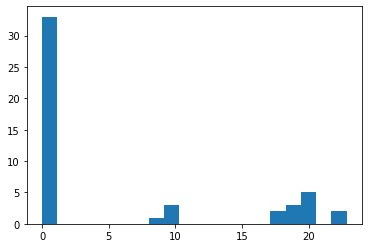

In [70]:
plt.hist(all_popt[:,1],20)

In [56]:
p0 = [1, 1] # this is an mandatory initial guess
bound = ([1, -np.inf], [np.inf, np.inf])

all_popt = part_fit(sigmoid, acc_second_prop_reshaped, 2, p0, bound)
df = pd.DataFrame(all_popt2, columns = ['x0','k'])
# df.to_csv("params/sigmoid.csv")
print(all_popt2.shape)

(49, 2)


(array([44.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  2.]),
 array([-6.16890333e-03,  9.97726630e-01,  2.00162216e+00,  3.00551770e+00,
         4.00941323e+00,  5.01330876e+00,  6.01720429e+00,  7.02109983e+00,
         8.02499536e+00,  9.02889089e+00,  1.00327864e+01,  1.10366820e+01,
         1.20405775e+01,  1.30444730e+01,  1.40483686e+01,  1.50522641e+01,
         1.60561596e+01,  1.70600552e+01,  1.80639507e+01,  1.90678462e+01,
         2.00717418e+01]),
 <BarContainer object of 20 artists>)

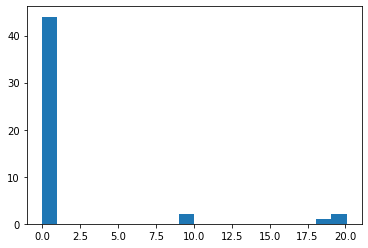

In [69]:
plt.hist(all_popt2[:,1],20)

A visual check of fits

In [1]:
y_data = acc_first_prop_reshaped[6,:]
x_data = np.linspace(1, acc_first_prop_reshaped.shape[1], acc_first_prop_reshaped.shape[1])

x = np.linspace(-120, 120, 241)
print(x)
y = sigmoid(x, *all_popt[6,:])
plt.plot(x_data, y_data, label='data', linestyle='', marker = 'o', mfc = 'none')
plt.plot(x,y, label='fit')
plt.legend()    

NameError: name 'acc_first_prop_reshaped' is not defined

Now fit for our linear models

(49, 2)


(array([5., 6., 8., 4., 7., 7., 2., 4., 2., 4.]),
 array([0.22219488, 0.28367372, 0.34515256, 0.4066314 , 0.46811024,
        0.52958907, 0.59106791, 0.65254675, 0.71402559, 0.77550443,
        0.83698327]),
 <BarContainer object of 10 artists>)

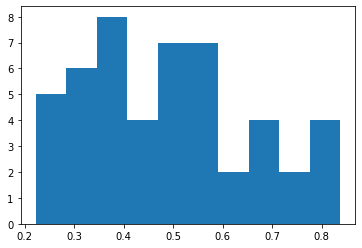

In [85]:
p0 = [1, .5] # this is an mandatory initial guess
bound = ([-np.inf, -np.inf], [np.inf, np.inf])

all_popt = part_fit(linear, acc_third_prop_reshaped, 2, p0, bound)
df = pd.DataFrame(all_popt, columns = ['w','b'])
df.to_csv("params_trialwise/third/linear.csv")
print(all_popt.shape)
plt.hist(all_popt[:,1],10)

(array([ 1.,  3.,  2.,  5., 11., 17.,  5.,  2.,  0.,  3.]),
 array([-0.00349924, -0.0024014 , -0.00130356, -0.00020572,  0.00089212,
         0.00198996,  0.0030878 ,  0.00418565,  0.00528349,  0.00638133,
         0.00747917]),
 <BarContainer object of 10 artists>)

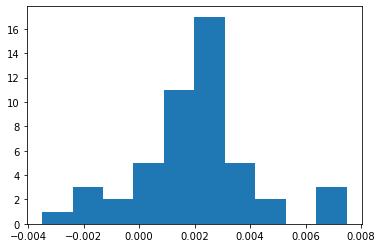

In [86]:
plt.hist(all_popt[:,0],10)

Visual checks of linear models

[-120. -119. -118. -117. -116. -115. -114. -113. -112. -111. -110. -109.
 -108. -107. -106. -105. -104. -103. -102. -101. -100.  -99.  -98.  -97.
  -96.  -95.  -94.  -93.  -92.  -91.  -90.  -89.  -88.  -87.  -86.  -85.
  -84.  -83.  -82.  -81.  -80.  -79.  -78.  -77.  -76.  -75.  -74.  -73.
  -72.  -71.  -70.  -69.  -68.  -67.  -66.  -65.  -64.  -63.  -62.  -61.
  -60.  -59.  -58.  -57.  -56.  -55.  -54.  -53.  -52.  -51.  -50.  -49.
  -48.  -47.  -46.  -45.  -44.  -43.  -42.  -41.  -40.  -39.  -38.  -37.
  -36.  -35.  -34.  -33.  -32.  -31.  -30.  -29.  -28.  -27.  -26.  -25.
  -24.  -23.  -22.  -21.  -20.  -19.  -18.  -17.  -16.  -15.  -14.  -13.
  -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.   -2.   -1.
    0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.
   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.
   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.
   36.   37.   38.   39.   40.   41.   42.   43.   

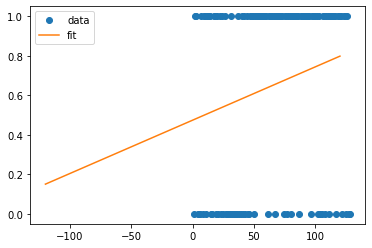

In [84]:
y_data = acc_second_prop_reshaped[0,:]
x_data = np.linspace(1, acc_first_prop_reshaped.shape[1], acc_first_prop_reshaped.shape[1])

x = np.linspace(-120, 120, 241)
print(x)
y = linear(x, *all_popt[0,:])
plt.plot(x_data, y_data, label='data', linestyle='', marker = 'o')
plt.plot(x,y, label='fit')
plt.legend()    

Now we fit the relu model

(49, 3)


(array([5., 7., 9., 5., 8., 4., 1., 4., 2., 4.]),
 array([0.22219488, 0.28367372, 0.34515256, 0.4066314 , 0.46811024,
        0.52958907, 0.59106791, 0.65254675, 0.71402559, 0.77550443,
        0.83698327]),
 <BarContainer object of 10 artists>)

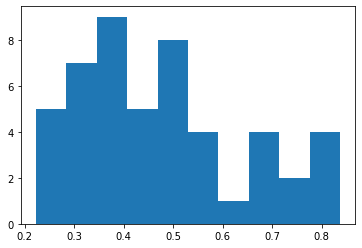

In [98]:
# def relu(x, w, b1, b2):
#     y = np.maximum((x * w - b1),0) + b2
#     return y

p0 = [1, 0, 0] # this is an mandatory initial guess
bound = ([-np.inf, 0, -np.inf], [np.inf, np.inf, np.inf])

all_popt = part_fit(relu, acc_third_prop_reshaped, 3, p0, bound)
df = pd.DataFrame(all_popt, columns = ['w','b1',"b2"])
df.to_csv("params_trialwise/third/relu.csv")
print(all_popt.shape)
plt.hist(all_popt[:,2],10)

(array([5., 7., 9., 5., 8., 4., 1., 4., 2., 4.]),
 array([0.22219488, 0.28367372, 0.34515256, 0.4066314 , 0.46811024,
        0.52958907, 0.59106791, 0.65254675, 0.71402559, 0.77550443,
        0.83698327]),
 <BarContainer object of 10 artists>)

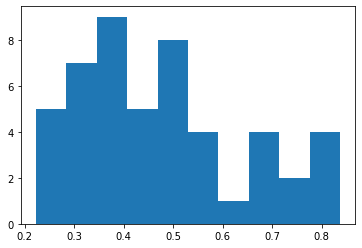

In [101]:
plt.hist(all_popt[:,2],10)

Now we fit a linear step function

(49, 2)


(array([ 3.,  6.,  4.,  1.,  2.,  1.,  1.,  1.,  0., 30.]),
 array([  5.73591875,  17.96232687,  30.188735  ,  42.41514312,
         54.64155125,  66.86795937,  79.0943675 ,  91.32077562,
        103.54718375, 115.77359187, 128.        ]),
 <BarContainer object of 10 artists>)

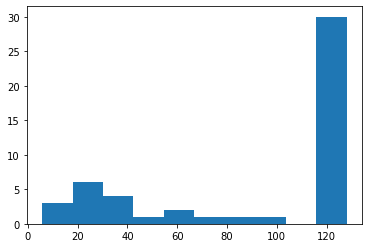

In [24]:
p0 = [80, 120] # this is an mandatory initial guess
bound = ([0, 1e-10], [np.inf, 128])

all_popt = part_fit(linear_step_func, acc_third_prop_reshaped, 2, p0, bound)
df = pd.DataFrame(all_popt, columns = ['x0','x1'])
df.to_csv("params_trialwise/third/linear_step_2.csv")
print(all_popt.shape)
plt.hist(all_popt[:,1],10)

(array([42.,  0.,  1.,  1.,  0.,  0.,  2.,  1.,  1.,  1.]),
 array([  0.        ,  11.73055556,  23.46111112,  35.19166668,
         46.92222224,  58.6527778 ,  70.38333335,  82.11388891,
         93.84444447, 105.57500003, 117.30555559]),
 <BarContainer object of 10 artists>)

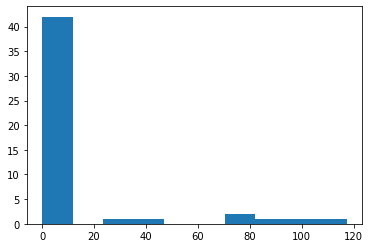

In [25]:
plt.hist(all_popt[:,0],10)

[-120. -119. -118. -117. -116. -115. -114. -113. -112. -111. -110. -109.
 -108. -107. -106. -105. -104. -103. -102. -101. -100.  -99.  -98.  -97.
  -96.  -95.  -94.  -93.  -92.  -91.  -90.  -89.  -88.  -87.  -86.  -85.
  -84.  -83.  -82.  -81.  -80.  -79.  -78.  -77.  -76.  -75.  -74.  -73.
  -72.  -71.  -70.  -69.  -68.  -67.  -66.  -65.  -64.  -63.  -62.  -61.
  -60.  -59.  -58.  -57.  -56.  -55.  -54.  -53.  -52.  -51.  -50.  -49.
  -48.  -47.  -46.  -45.  -44.  -43.  -42.  -41.  -40.  -39.  -38.  -37.
  -36.  -35.  -34.  -33.  -32.  -31.  -30.  -29.  -28.  -27.  -26.  -25.
  -24.  -23.  -22.  -21.  -20.  -19.  -18.  -17.  -16.  -15.  -14.  -13.
  -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.   -2.   -1.
    0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.
   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.
   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.
   36.   37.   38.   39.   40.   41.   42.   43.   

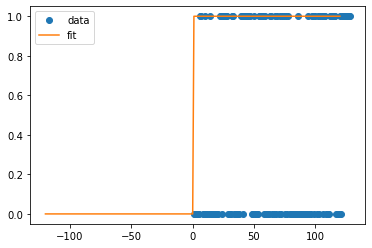

In [114]:
y_data = acc_third_prop_reshaped[10,:]
x_data = np.linspace(1, acc_first_prop_reshaped.shape[1], acc_first_prop_reshaped.shape[1])

x = np.linspace(-120, 120, 241)
print(x)
y = linear_step_func(x, *all_popt[10,:])
plt.plot(x_data, y_data, label='data', linestyle='', marker = 'o')
plt.plot(x,y, label='fit')
plt.legend()   